# Deep Learning Assignment 2  

SID: 12012524  
Name: Zhangjie Chen



In [19]:
# imports
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
# Set the random seeds for reproducibility
np.random.seed(0)

def plot_data(x_train, x_test, y_train, y_test):

    # Create a figure with 1 row and 2 columns for subplots
    _, ax = plt.subplots(1, 2, figsize=(7.5, 3))
    
    # Plotting the training set in the first subplot
    # Class 0 points
    ax[0].scatter(x_train[y_train[:, 0] == 1][:, 0], x_train[y_train[:, 0] == 1][:, 1], 
                  c='red', label='Class 0')
    # Class 1 points
    ax[0].scatter(x_train[y_train[:, 1] == 1][:, 0], x_train[y_train[:, 1] == 1][:, 1], 
                  c='blue', label='Class 1')
    ax[0].set_title('Training Set')
    ax[0].legend()

    # Plotting the test set in the second subplot
    # Class 0 points
    ax[1].scatter(x_test[y_test[:, 0] == 1][:, 0], x_test[y_test[:, 0] == 1][:, 1], 
                  c='red', label='Class 0')
    # Class 1 points
    ax[1].scatter(x_test[y_test[:, 1] == 1][:, 0], x_test[y_test[:, 1] == 1][:, 1], 
                  c='blue', label='Class 1')
    ax[1].set_title('Test Set')
    ax[1].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

## Part I
### Task 1-2

#### Create Datasets

Moons Dataset

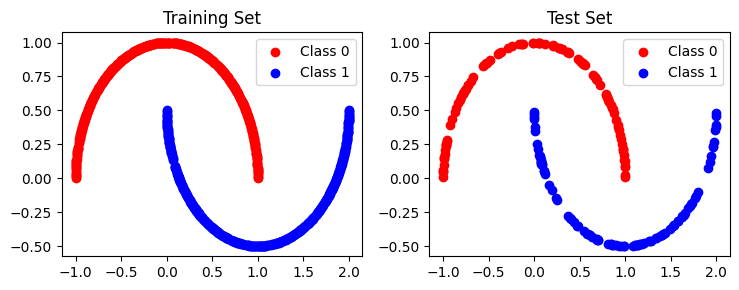

In [20]:
# generate moon dataset shuffled in a consistent manner as in Assignment I
x, y = sklearn.datasets.make_moons(n_samples=1000, random_state=42)

# one-hot encoding on the labels
encoder = sklearn.preprocessing.OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.toarray()

# train test split
x_train_moon = x[:800]
x_test_moon = x[800:]

y_train_moon = y[:800]
y_test_moon = y[800:]

plot_data(x_train_moon, x_test_moon, y_train_moon, y_test_moon)

moons_dataset = {}
moons_dataset['x_train'] = x_train_moon
moons_dataset['x_test'] = x_test_moon
moons_dataset['y_train'] = y_train_moon
moons_dataset['y_test'] = y_test_moon

Circles Dataset

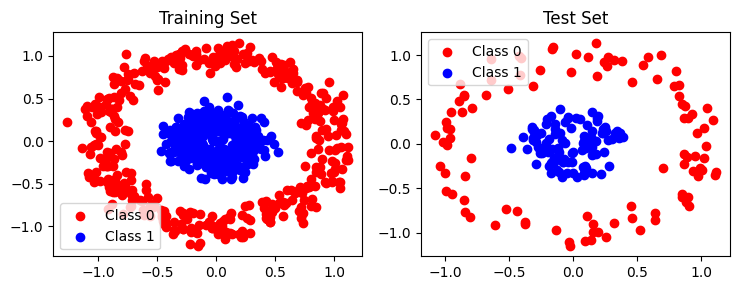

In [21]:
# Generate circular dataset
x, y = sklearn.datasets.make_circles(n_samples=1000, noise=0.1, factor=0.25, random_state=42)

# one-hot encoding on the labels
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.toarray()

# train test split
x_train_circ = x[:800]
x_test_circ = x[800:]

y_train_circ = y[:800]
y_test_circ = y[800:]

plot_data(x_train_circ, x_test_circ, y_train_circ, y_test_circ)

circles_dataset = {}
circles_dataset['x_train'] = x_train_circ
circles_dataset['x_test'] = x_test_circ
circles_dataset['y_train'] = y_train_circ
circles_dataset['y_test'] = y_test_circ


Blobs Dataset

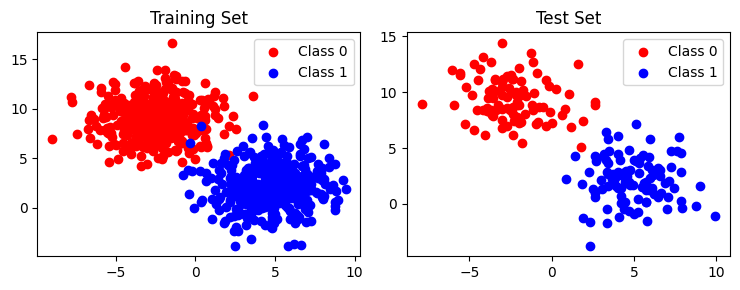

In [22]:
# Generate blob dataset
x, y = sklearn.datasets.make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=2)

# one-hot encoding on the labels
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.toarray()

# train test split
x_train_blob = x[:800]
x_test_blob = x[800:]

y_train_blob = y[:800]
y_test_blob = y[800:]

plot_data(x_train_blob, x_test_blob, y_train_blob, y_test_blob)

blobs_dataset = {}
blobs_dataset['x_train'] = x_train_blob
blobs_dataset['x_test'] = x_test_blob
blobs_dataset['y_train'] = y_train_blob
blobs_dataset['y_test'] = y_test_blob


### Train models

Moons - train

In [4]:
import pytorch_train_mlp
torch_acc, torch_loss = pytorch_train_mlp.train(moons_dataset)
import train_mlp_numpy
_, _, np_acc, np_loss = train_mlp_numpy.train(moons_dataset)

Step: 0, Test Loss: 0.7191781401634216, Test Accuracy: 0.27%
Step: 10, Test Loss: 0.7086549401283264, Test Accuracy: 0.26%
Step: 20, Test Loss: 0.6985142230987549, Test Accuracy: 0.27%
Step: 30, Test Loss: 0.6887808442115784, Test Accuracy: 0.4%
Step: 40, Test Loss: 0.6794673204421997, Test Accuracy: 0.6%
Step: 50, Test Loss: 0.6705824136734009, Test Accuracy: 0.65%
Step: 60, Test Loss: 0.6621277332305908, Test Accuracy: 0.68%
Step: 70, Test Loss: 0.6540973782539368, Test Accuracy: 0.695%
Step: 80, Test Loss: 0.646481454372406, Test Accuracy: 0.7%
Step: 90, Test Loss: 0.6392696499824524, Test Accuracy: 0.7%
Step: 100, Test Loss: 0.632446825504303, Test Accuracy: 0.705%
Step: 110, Test Loss: 0.6259962320327759, Test Accuracy: 0.71%
Step: 120, Test Loss: 0.6199004650115967, Test Accuracy: 0.72%
Step: 130, Test Loss: 0.6141397356987, Test Accuracy: 0.73%
Step: 140, Test Loss: 0.6086952090263367, Test Accuracy: 0.735%
Step: 150, Test Loss: 0.6035504341125488, Test Accuracy: 0.735%
Step: 16

Moons - eval

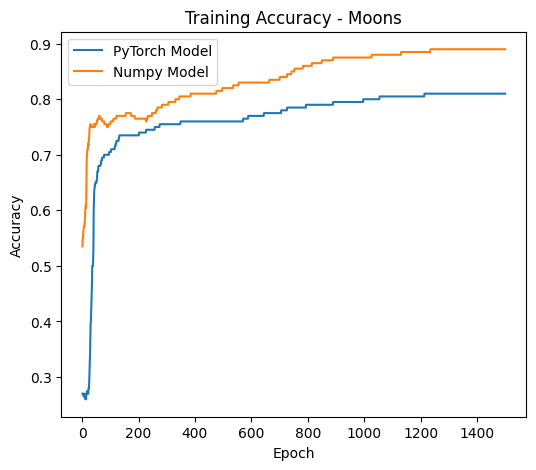

In [5]:
num_epochs = range(1, len(torch_acc) + 1)
plt.figure(figsize=(6, 5))
plt.plot(num_epochs, torch_acc, label='PyTorch Model')
plt.plot(num_epochs, np_acc, label='Numpy Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Moons')
plt.legend()

plt.show()

Circles - train

In [6]:
torch_acc, torch_loss = pytorch_train_mlp.train(circles_dataset)
_, _, np_acc, np_loss = train_mlp_numpy.train(circles_dataset)

Step: 0, Test Loss: 0.6847509145736694, Test Accuracy: 0.705%
Step: 10, Test Loss: 0.6841738820075989, Test Accuracy: 0.715%
Step: 20, Test Loss: 0.683602511882782, Test Accuracy: 0.715%
Step: 30, Test Loss: 0.6830364465713501, Test Accuracy: 0.71%
Step: 40, Test Loss: 0.682475745677948, Test Accuracy: 0.72%
Step: 50, Test Loss: 0.6819194555282593, Test Accuracy: 0.715%
Step: 60, Test Loss: 0.6813652515411377, Test Accuracy: 0.705%
Step: 70, Test Loss: 0.680814802646637, Test Accuracy: 0.695%
Step: 80, Test Loss: 0.6802676320075989, Test Accuracy: 0.69%
Step: 90, Test Loss: 0.6797232031822205, Test Accuracy: 0.7%
Step: 100, Test Loss: 0.6791807413101196, Test Accuracy: 0.7%
Step: 110, Test Loss: 0.6786408424377441, Test Accuracy: 0.7%
Step: 120, Test Loss: 0.6781030893325806, Test Accuracy: 0.7%
Step: 130, Test Loss: 0.6775660514831543, Test Accuracy: 0.695%
Step: 140, Test Loss: 0.6770311594009399, Test Accuracy: 0.695%
Step: 150, Test Loss: 0.6764973998069763, Test Accuracy: 0.695%
S

Circles - eval

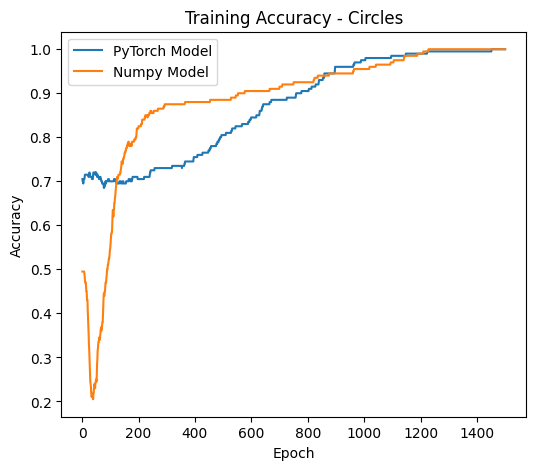

In [7]:
num_epochs = range(1, len(torch_acc) + 1)
plt.figure(figsize=(6, 5))
plt.plot(num_epochs, torch_acc, label='PyTorch Model')
plt.plot(num_epochs, np_acc, label='Numpy Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Circles')
plt.legend()

plt.show()

Blobs - train

In [8]:
torch_acc, torch_loss = pytorch_train_mlp.train(blobs_dataset)
_, _, np_acc, np_loss = train_mlp_numpy.train(blobs_dataset)

Step: 0, Test Loss: 0.624664843082428, Test Accuracy: 0.825%
Step: 10, Test Loss: 0.4719359874725342, Test Accuracy: 0.94%
Step: 20, Test Loss: 0.4232616424560547, Test Accuracy: 0.96%
Step: 30, Test Loss: 0.3996531665325165, Test Accuracy: 0.975%
Step: 40, Test Loss: 0.38563376665115356, Test Accuracy: 0.985%
Step: 50, Test Loss: 0.3762296438217163, Test Accuracy: 0.985%
Step: 60, Test Loss: 0.36943739652633667, Test Accuracy: 0.985%
Step: 70, Test Loss: 0.3642696142196655, Test Accuracy: 0.985%
Step: 80, Test Loss: 0.36018675565719604, Test Accuracy: 0.99%
Step: 90, Test Loss: 0.3568655848503113, Test Accuracy: 0.99%
Step: 100, Test Loss: 0.3541048765182495, Test Accuracy: 0.99%
Step: 110, Test Loss: 0.35176387429237366, Test Accuracy: 0.99%
Step: 120, Test Loss: 0.3497530221939087, Test Accuracy: 0.99%
Step: 130, Test Loss: 0.3480045795440674, Test Accuracy: 0.99%
Step: 140, Test Loss: 0.346468061208725, Test Accuracy: 0.99%
Step: 150, Test Loss: 0.34510570764541626, Test Accuracy: 

Blobs - eval

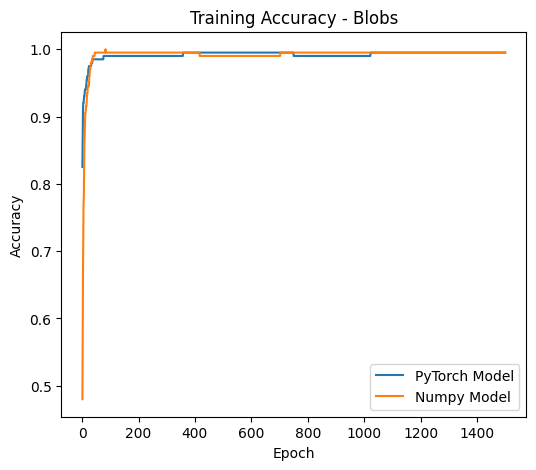

In [9]:
num_epochs = range(1, len(torch_acc) + 1)
plt.figure(figsize=(6, 5))
plt.plot(num_epochs, torch_acc, label='PyTorch Model')
plt.plot(num_epochs, np_acc, label='Numpy Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Blobs')
plt.legend()

plt.show()

#### Task 3
Using **torchvision.datasets.CIFAR10** load the CIFAR10 dataset. Using PyTorch and the units, optimisation methods, regularisation methods, etc., studied in these weeks, try to obtain the highest accuracy you can on this dataset. Whenever possible use validation sets, but don’t worry too much about it at this stage. You’re free to implement your architecture in a separate .py file, but you should use a jupyter notebook to run the experiments, illustrate them, and comment on the results.

In [2]:
import pytorch_cifar_mlp
import torch
import torchvision.transforms as transforms
import torchvision

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define train parameters
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# Load dataset
cifar_train = torchvision.datasets.CIFAR10('../cifar10/', download=True, train=True, transform=transform)
cifar_test = torchvision.datasets.CIFAR10('../cifar10/', download=True, train=False, transform=transform)

cifar_train_dataloader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size)
cifar_test_dataloader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size)

# train model
train_acc, train_loss, test_acc, test_loss = pytorch_cifar_mlp.train(cifar_train_dataloader, cifar_test_dataloader, learning_rate, num_epochs)


Files already downloaded and verified
Files already downloaded and verified
Epoch: 0, Test Accuracy: 0.3301.
Epoch: 1, Test Accuracy: 0.3950.
Epoch: 2, Test Accuracy: 0.4251.
Epoch: 3, Test Accuracy: 0.4473.
Epoch: 4, Test Accuracy: 0.4606.
Epoch: 5, Test Accuracy: 0.4764.
Epoch: 6, Test Accuracy: 0.4890.
Epoch: 7, Test Accuracy: 0.4950.
Epoch: 8, Test Accuracy: 0.5024.
Epoch: 9, Test Accuracy: 0.5093.
Epoch: 10, Test Accuracy: 0.5157.
Epoch: 11, Test Accuracy: 0.5167.
Epoch: 12, Test Accuracy: 0.5180.
Epoch: 13, Test Accuracy: 0.5211.
Epoch: 14, Test Accuracy: 0.5224.
Epoch: 15, Test Accuracy: 0.5239.
Epoch: 16, Test Accuracy: 0.5248.
Epoch: 17, Test Accuracy: 0.5258.
Epoch: 18, Test Accuracy: 0.5256.
Epoch: 19, Test Accuracy: 0.5277.
Epoch: 20, Test Accuracy: 0.5280.
Epoch: 21, Test Accuracy: 0.5285.
Epoch: 22, Test Accuracy: 0.5259.
Epoch: 23, Test Accuracy: 0.5265.
Epoch: 24, Test Accuracy: 0.5262.
Epoch: 25, Test Accuracy: 0.5230.
Epoch: 26, Test Accuracy: 0.5214.
Epoch: 27, Test 

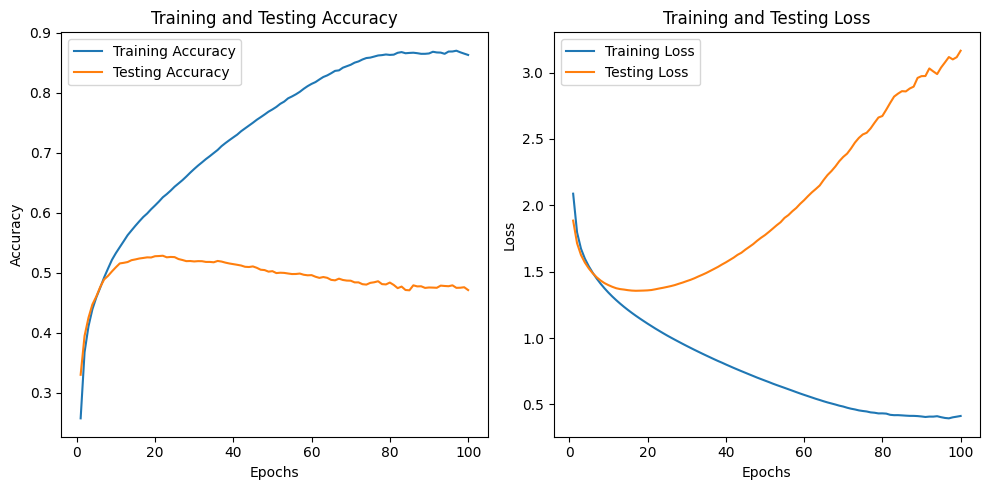

In [7]:
# plot model result
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, test_acc, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()